In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

Using TensorFlow backend.


In [2]:
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

In [3]:
from keras import models, layers, optimizers

def conv_1d_model(max_features, length_input_sequence):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_features,
                               output_dim=128,
                               input_length=length_input_sequence))
    model.add(layers.Conv1D(filters=32,
                            kernel_size=7,
                            activation='relu'))
    model.add(layers.MaxPool1D(pool_size=5))
    model.add(layers.Conv1D(filters=32,
                            kernel_size=7,
                            activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(units=1))

    model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    return model

In [4]:
model = conv_1d_model(max_features, length_input_sequence=maxlen)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_data, train_labels,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 5s 258us/step - loss: 0.8337 - acc: 0.5091 - val_loss: 0.6873 - val_acc: 0.5650
Epoch 2/15
20000/20000 [==============================] - 3s 172us/step - loss: 0.6699 - acc: 0.6386 - val_loss: 0.6641 - val_acc: 0.6592
Epoch 3/15
20000/20000 [==============================] - 3s 171us/step - loss: 0.6234 - acc: 0.7522 - val_loss: 0.6079 - val_acc: 0.7428
Epoch 4/15
20000/20000 [==============================] - 3s 171us/step - loss: 0.5257 - acc: 0.8078 - val_loss: 0.4843 - val_acc: 0.8056
Epoch 5/15
20000/20000 [==============================] - 3s 170us/step - loss: 0.4126 - acc: 0.8486 - val_loss: 0.4315 - val_acc: 0.8292
Epoch 6/15
20000/20000 [==============================] - 3s 170us/step - loss: 0.3510 - acc: 0.8681 - val_loss: 0.4139 - val_acc: 0.8362
Epoch 7/15
20000/20000 [==============================] - 3s 170us/step - loss: 0.3078 - acc: 0.8683 - val_loss: 0.4410 - v

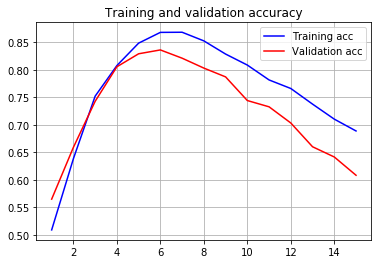

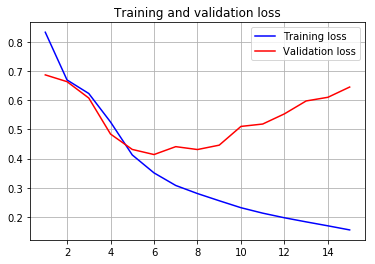

In [7]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(loss)) + 1

plt.figure('Training and validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training acc')
plt.plot(epochs, val_acc, color='r', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

plt.figure('Training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Retrain a model.
model = conv_1d_model(max_features, length_input_sequence=maxlen)
history = model.fit(train_data, train_labels,
                    epochs=6,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 4s 189us/step - loss: 0.7001 - acc: 0.5403 - val_loss: 0.6791 - val_acc: 0.6124
Epoch 2/6
20000/20000 [==============================] - 3s 172us/step - loss: 0.6554 - acc: 0.6930 - val_loss: 0.6510 - val_acc: 0.6876
Epoch 3/6
20000/20000 [==============================] - 3s 172us/step - loss: 0.6000 - acc: 0.7790 - val_loss: 0.5792 - val_acc: 0.7364
Epoch 4/6
20000/20000 [==============================] - 3s 174us/step - loss: 0.4924 - acc: 0.8169 - val_loss: 0.4736 - val_acc: 0.8028
Epoch 5/6
20000/20000 [==============================] - 3s 175us/step - loss: 0.3957 - acc: 0.8477 - val_loss: 0.4405 - val_acc: 0.8274
Epoch 6/6
20000/20000 [==============================] - 3s 174us/step - loss: 0.3382 - acc: 0.8700 - val_loss: 0.4083 - val_acc: 0.8454


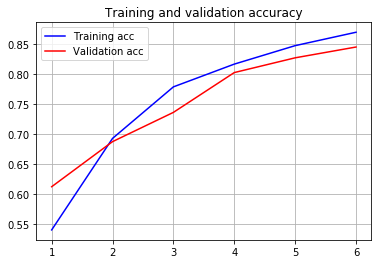

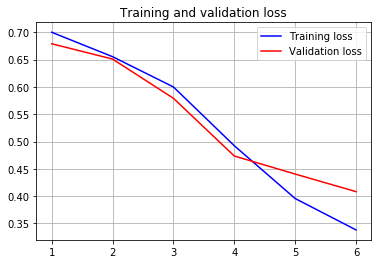

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(loss)) + 1

plt.figure('Training and validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training acc')
plt.plot(epochs, val_acc, color='r', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

plt.figure('Training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()